In [9]:
import imageio
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [10]:
plt.rcParams['figure.figsize'] = [8.0, 4.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

# Betatronic Mismatch

In [11]:
def emittance_beta_mismatch(eps_0, beta_1, beta_2, alpha_1, alpha_2):
    return ((eps_0 / 2) * ( (beta_1 / beta_2) + (beta_2/beta_1) + (beta_2 / beta_1)*(alpha_1 - alpha_2*(beta_1/beta_2))**2 ))

In [12]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

# Test for mismatch factors of 1.1, 1.1

In [15]:
# Vertical parameters from PFW optics (6.21, 6.10)

beta_mismatch = 1.1
alpha_mismatch = 1.1

eps_0 = 1.2E-6
beta_1 = 22.422
beta_2 = beta_1 * beta_mismatch
alpha_1 = 0.052076
alpha_2 = alpha_1 * alpha_mismatch

eps_new = emittance_beta_mismatch(eps_0, beta_1, beta_2, alpha_1, alpha_2)
print 'Beta mismatch factor = ', beta_mismatch
print 'Alpha mismatch factor = ', alpha_mismatch
print 'Resulting emittance increase = ', round_sig((eps_new/eps_0)*100-100, 2), '%'

Beta mismatch factor =  1.1
Alpha mismatch factor =  1.1
Resulting emittance increase =  0.45 %


# Create a range of mismatch factors and plot resulting expected emittance growth

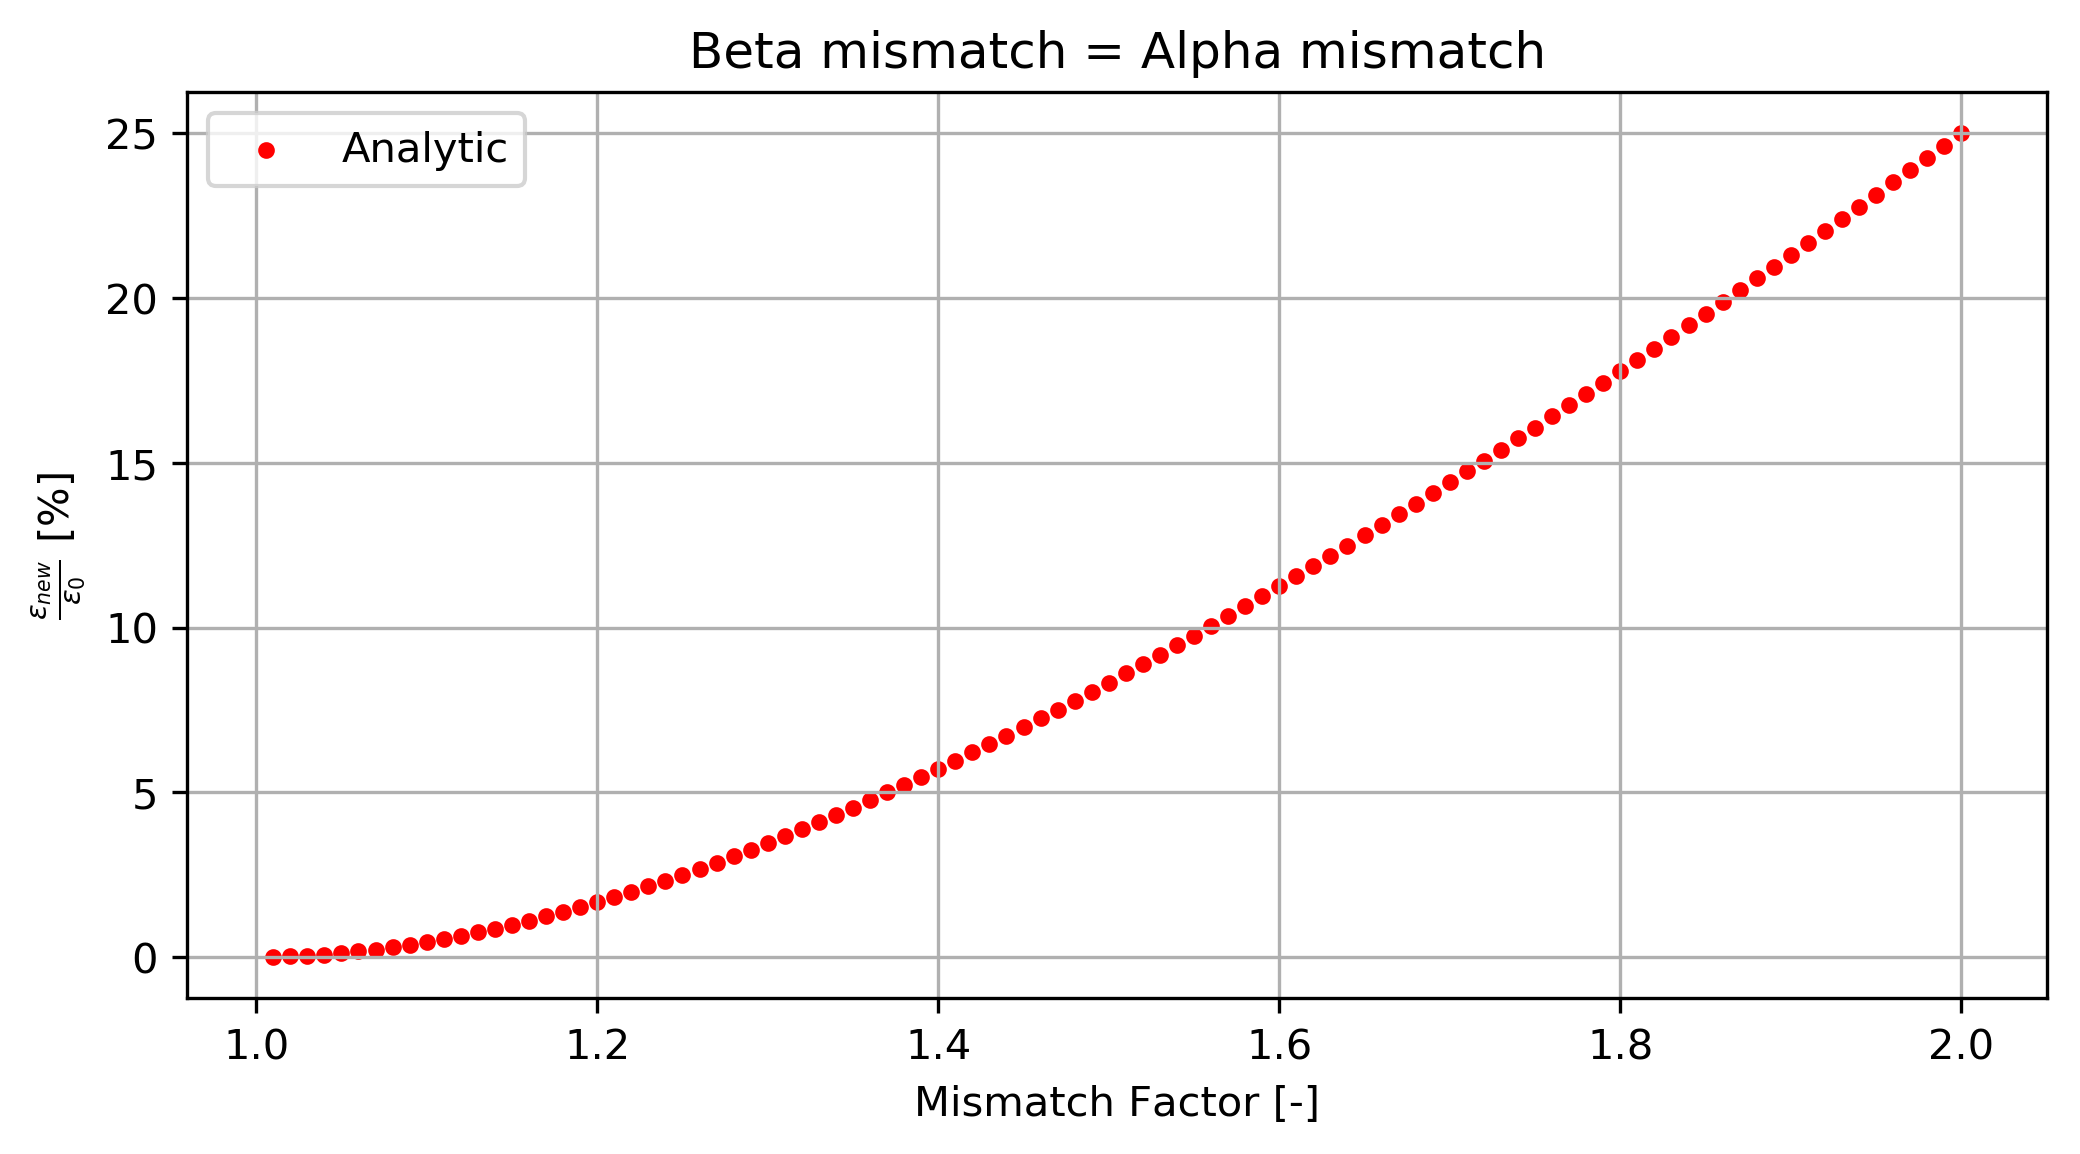

In [86]:
start = 1.01
stop = 2
step = 0.01
mismatch_factors = np.arange(start, stop+step, step)

emittance_factors = []

eps_0 = 1.2E-6
beta_1 = 22.422
alpha_1 = 0.052076

for m in mismatch_factors:
    #print m
    beta_2 = beta_1 * m
    alpha_2 = alpha_1 * m
    eps_new = emittance_beta_mismatch(eps_0, beta_1, beta_2, alpha_1, alpha_2)
    emittance_factors.append(round_sig((eps_new/eps_0)*100-100, 4))

#emittance_factors  

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = 'Beta mismatch = Alpha mismatch'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\epsilon_{new}}{\epsilon_0}$ [%]');
ax1.set_xlabel('Mismatch Factor [-]');

ax1.scatter(mismatch_factors, emittance_factors, marker='.', color='r', label='Analytic');     
ax1.legend();
ax1.grid();

savename = 'Mismatch_Plots/Alpha_1_times_beta.png'
plt.savefig(savename, dpi = 800);

# Alpha mismatch = 5 * Beta mismatch

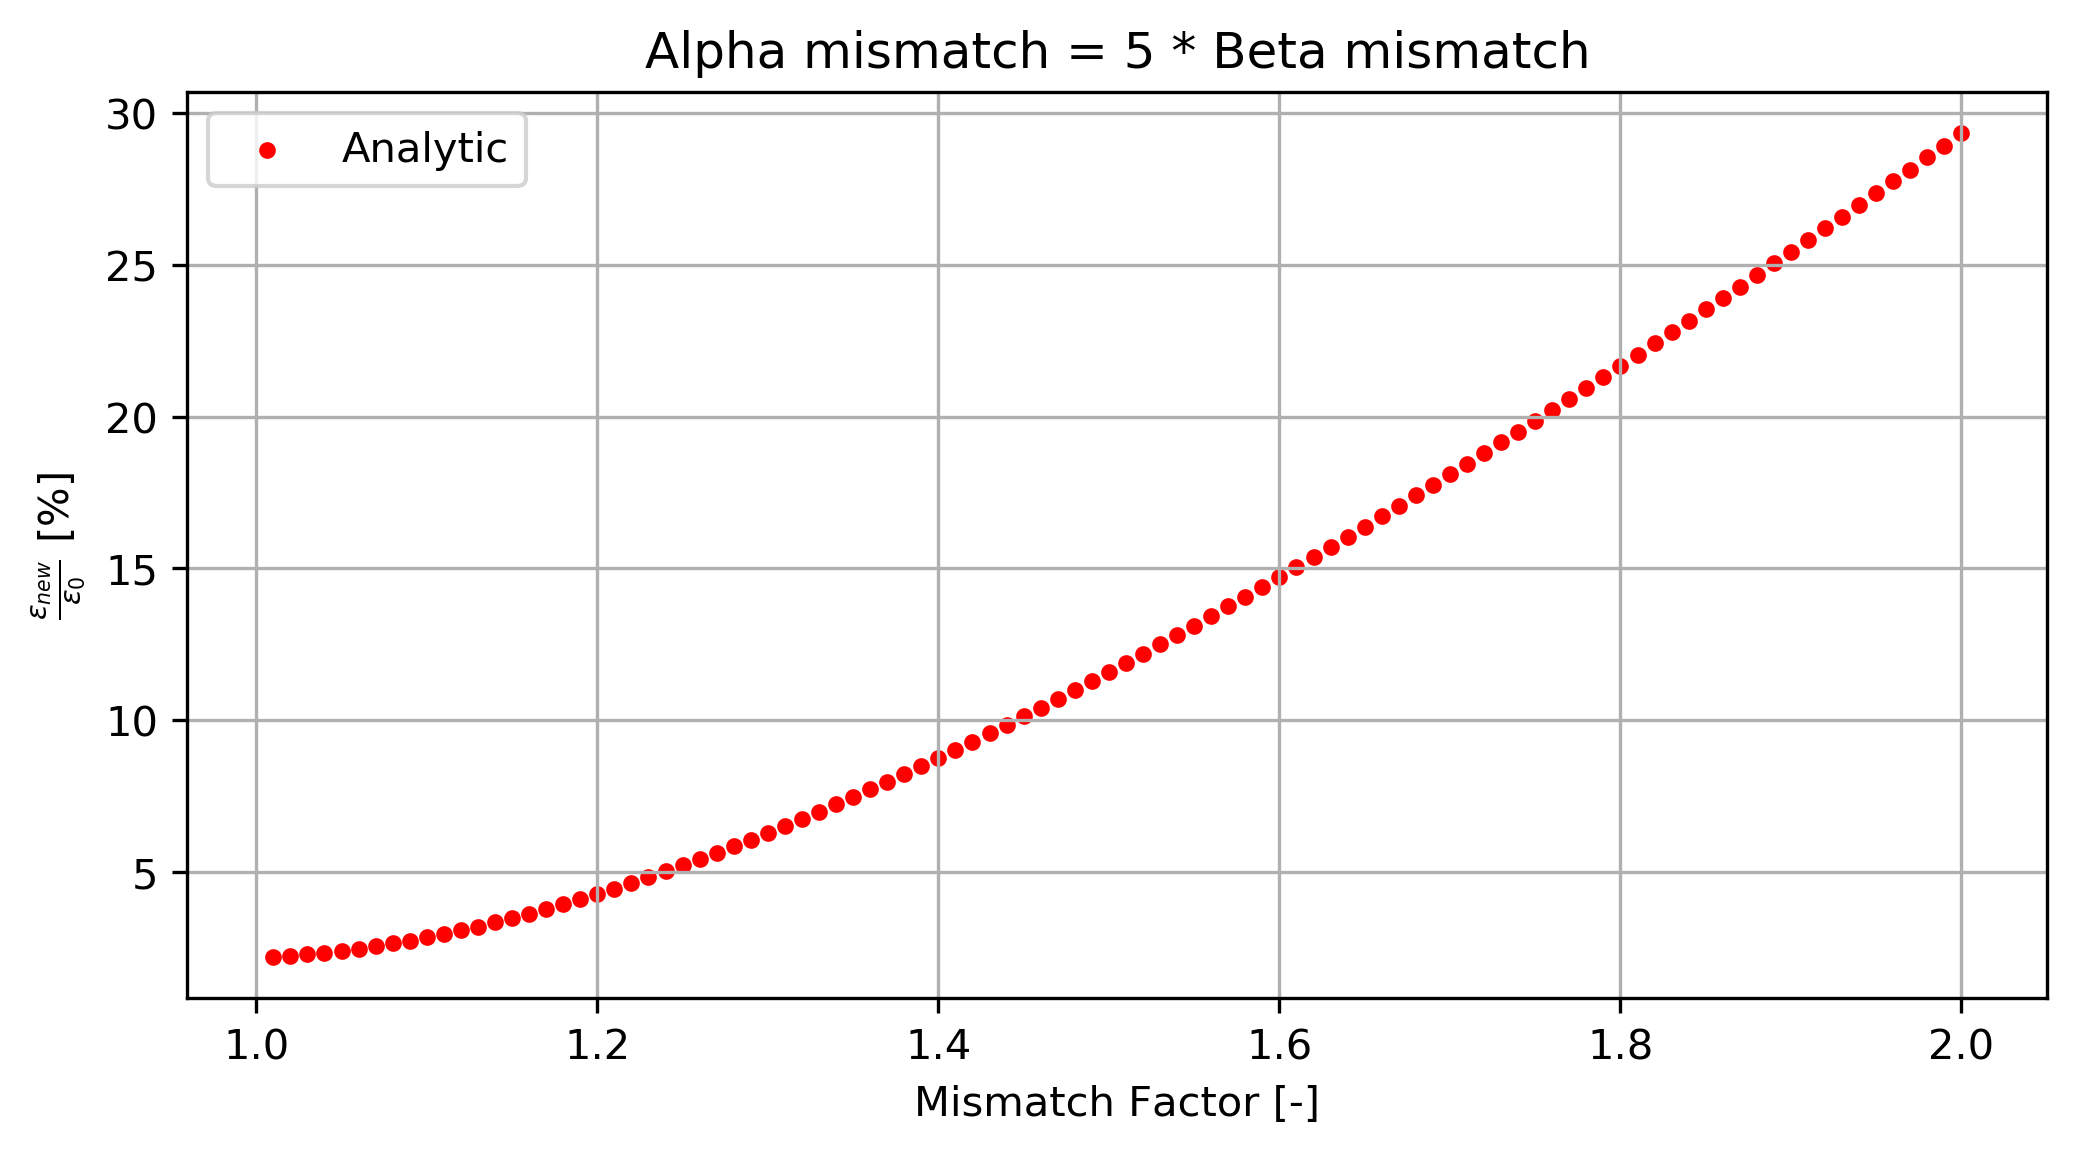

In [87]:
start = 1.01
stop = 2
step = 0.01
mismatch_factors = np.arange(start, stop+step, step)

emittance_factors = []

eps_0 = 1.2E-6
beta_1 = 22.422
alpha_1 = 0.052076

for m in mismatch_factors:
    #print m
    beta_2 = beta_1 * m
    alpha_2 = alpha_1 * 5 * m
    eps_new = emittance_beta_mismatch(eps_0, beta_1, beta_2, alpha_1, alpha_2)
    emittance_factors.append(round_sig((eps_new/eps_0)*100-100, 4))

#emittance_factors  

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = 'Alpha mismatch = 5 * Beta mismatch'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\epsilon_{new}}{\epsilon_0}$ [%]');
ax1.set_xlabel('Mismatch Factor [-]');

ax1.scatter(mismatch_factors, emittance_factors, marker='.', color='r', label='Analytic');      
ax1.legend();
ax1.grid();

savename = 'Mismatch_Plots/Alpha_5_times_beta.png'
plt.savefig(savename, dpi = 800);

# Alpha mismatch = 10 * Beta mismatch

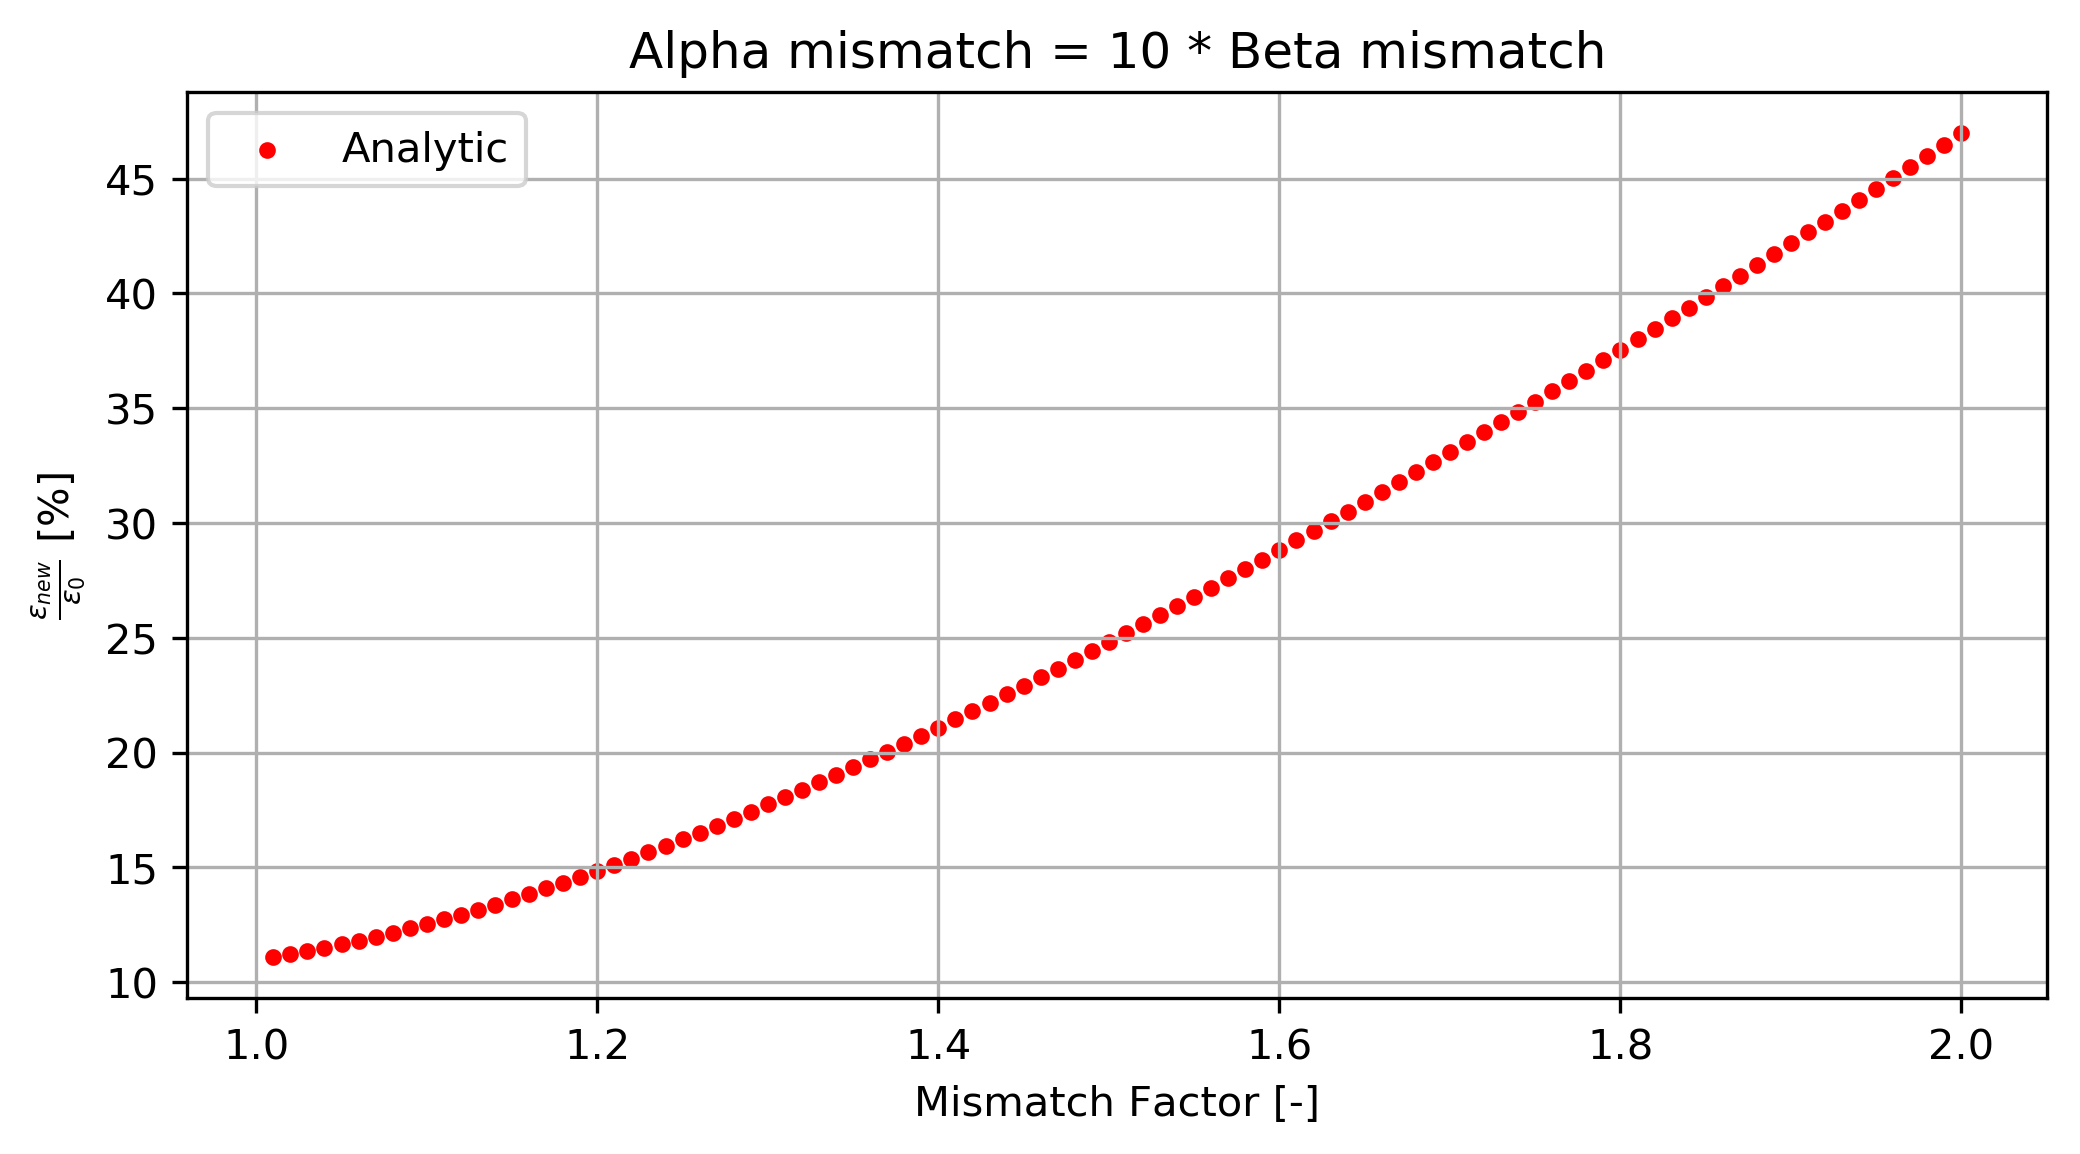

In [88]:
start = 1.01
stop = 2
step = 0.01
mismatch_factors = np.arange(start, stop+step, step)

emittance_factors = []

eps_0 = 1.2E-6
beta_1 = 22.422
alpha_1 = 0.052076

for m in mismatch_factors:
    #print m
    beta_2 = beta_1 * m
    alpha_2 = alpha_1 * 10 * m
    eps_new = emittance_beta_mismatch(eps_0, beta_1, beta_2, alpha_1, alpha_2)
    emittance_factors.append(round_sig((eps_new/eps_0)*100-100, 4))

#emittance_factors  

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = 'Alpha mismatch = 10 * Beta mismatch'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\epsilon_{new}}{\epsilon_0}$ [%]');
ax1.set_xlabel('Mismatch Factor [-]');

ax1.scatter(mismatch_factors, emittance_factors, marker='.', color='r', label='Analytic');        
ax1.legend();
ax1.grid();

savename = 'Mismatch_Plots/Alpha_10_times_beta.png'
plt.savefig(savename, dpi = 800);

In [ ]:
start = 1.01
stop = 2
step = 0.01
mismatch_factors = np.arange(start, stop+step, step)

emittance_factors = []

eps_0 = 1.2E-6
beta_1 = 22.422
alpha_1 = 0.052076

for m in mismatch_factors:
    #print m
    beta_2 = beta_1 * m
    alpha_2 = alpha_1 * 10 * m
    eps_new = emittance_beta_mismatch(eps_0, beta_1, beta_2, alpha_1, alpha_2)
    emittance_factors.append(round_sig((eps_new/eps_0)*100-100, 4))

#emittance_factors  

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = 'Alpha mismatch = 10 * Beta mismatch'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\epsilon_{new}}{\epsilon_0}$ [%]');
ax1.set_xlabel('Mismatch Factor [-]');

ax1.scatter(mismatch_factors, emittance_factors, marker='.', color='r', label='Analytic');        
ax1.legend();
ax1.grid();

savename = 'Mismatch_Plots/Alpha_10_times_beta.png'
plt.savefig(savename, dpi = 800);

# Beta-beating induced by a single quadupolar error on QDN72

In [57]:
def beta_beating_from_single_quad(delta_k):
    return delta_k / 0.0510425    

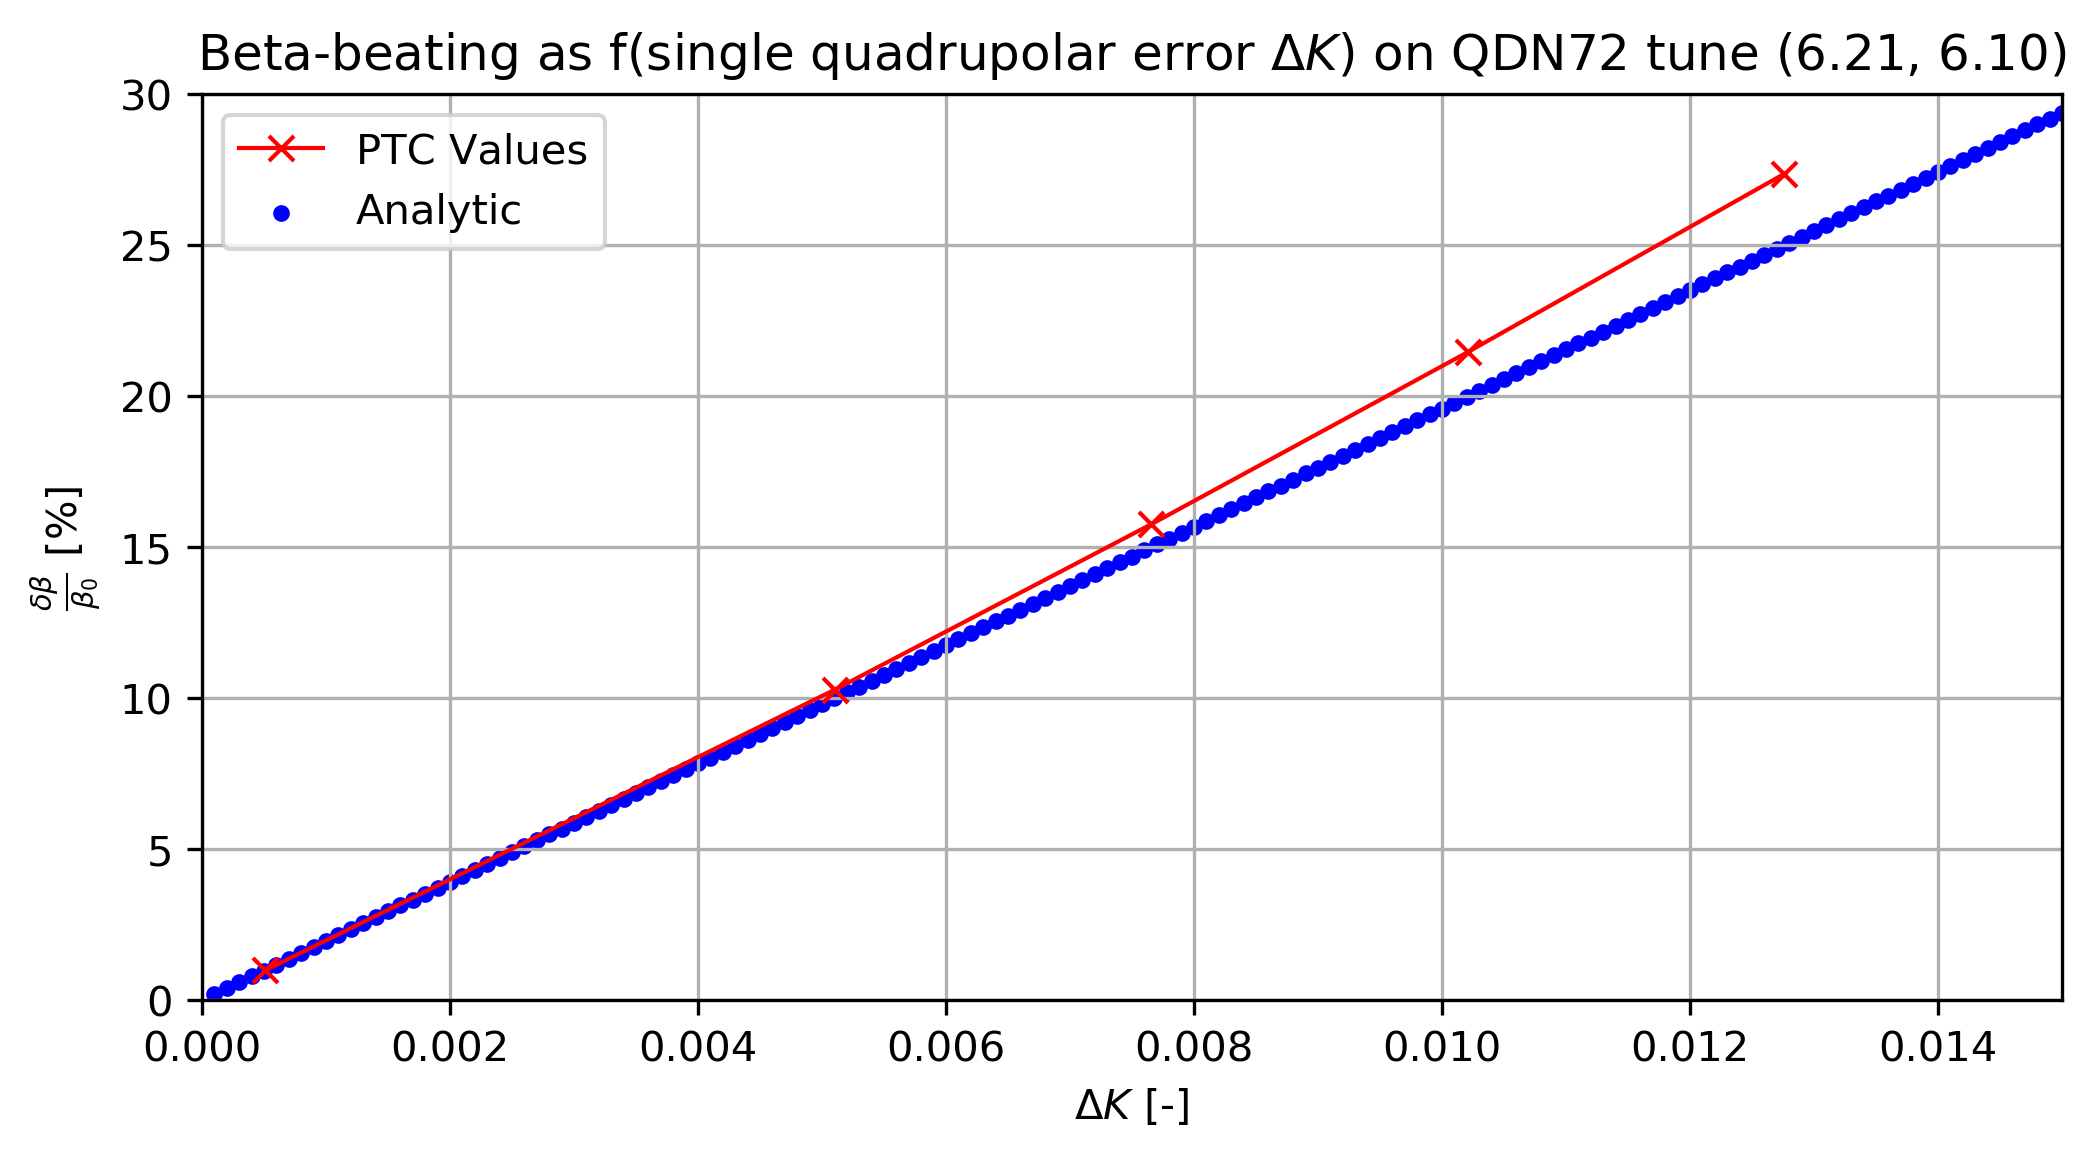

In [90]:
start = 0.0001
stop = 0.015
step = 0.0001
quad_errors = np.arange(start, stop+step, step)

beta_beating_factors = []

for dk in quad_errors:
    beta_beating = beta_beating_from_single_quad(dk)
    beta_beating_factors.append(round_sig(beta_beating*100))

dk_m = [0.000510425, 0.00510425, 0.007656, 0.0102085, 0.012760625]
bb_m = [0.987, 10.283, 15.76, 21.46, 27.3627]

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = r'Beta-beating as f(single quadrupolar error $\Delta K$) on QDN72 tune (6.21, 6.10)'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta \beta}{\beta_0}$ [%]');
ax1.set_xlabel(r'$\Delta K$ [-]');

ax1.scatter(quad_errors, beta_beating_factors, marker='.', color='b', label='Analytic');  
ax1.plot(dk_m, bb_m, marker='x', color='r', label='PTC Values');          


ax1.set_xlim(0, 0.015);
ax1.set_ylim(0, 30);
ax1.legend();
ax1.grid();

savename = 'Mismatch_Plots/Beat_Beating_as_function_of_DeltaK.png'
plt.savefig(savename, dpi = 800);